In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
respec = pd.read_csv('/content/gdrive/MyDrive/BigContest_data/respec.csv')
respec.head()

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,work_year
0,954900,553686,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,정규직,기타가족소유,30000000.0,SWITCHLOAN,0.0,1.0,1.0,27000000.0,50.0,16.0
1,137274,59516,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,기타,기타가족소유,10000000.0,LIVING,1.0,1.0,5.0,15000000.0,20.0,2.0
2,1570936,167320,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,정규직,자가,2000000.0,LIVING,1.0,1.0,7.0,344000000.0,30.0,6.0
3,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,LIVING,0.0,0.0,1.0,16000000.0,20.0,2.0
4,1614045,860410,1.0,2022-06-07 11:29:05,590.0,45000000.0,OTHERINCOME,기타,자가,15000000.0,SWITCHLOAN,1.0,0.0,1.0,20000000.0,40.0,6.0


### 1) yearly_income

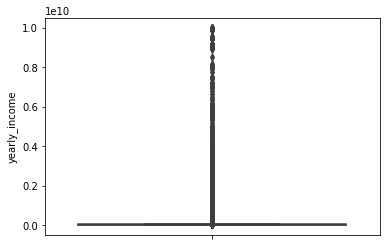

In [5]:
sns.boxplot(y= respec["yearly_income"])

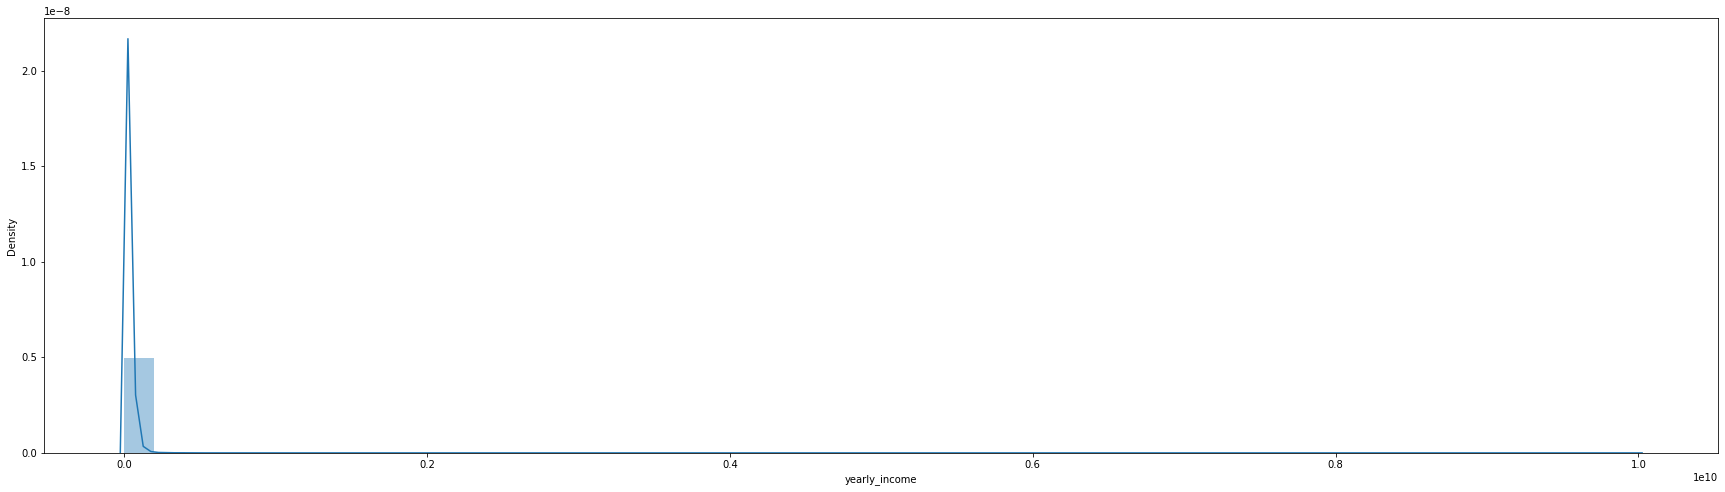

In [6]:
plt.figure(figsize=(30,8))
sns.distplot(respec['yearly_income'])
plt.show()

In [7]:
respec['yearly_income']=np.log(respec['yearly_income'])

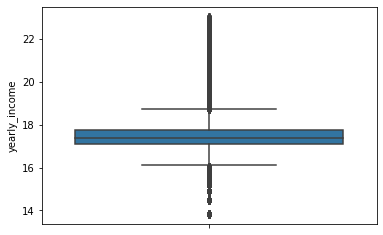

In [8]:
sns.boxplot(y= respec["yearly_income"])

In [9]:
IQR = respec['yearly_income'].quantile(0.75) - respec['yearly_income'].quantile(0.25)
print(respec['yearly_income'].quantile(0.25) - 1.5*IQR )
print(respec['yearly_income'].quantile(0.75) + 1.5*IQR )

16.092717394875763
18.708423264502414


In [10]:
respec.loc[respec['yearly_income'] <= (respec['yearly_income'].quantile(0.25) - 1.5*IQR )] =(respec['yearly_income'].quantile(0.25) - 1.5*IQR )
respec.loc[respec['yearly_income'] >= (respec['yearly_income'].quantile(0.75) + 1.5*IQR )] = (respec['yearly_income'].quantile(0.75) + 1.5*IQR )

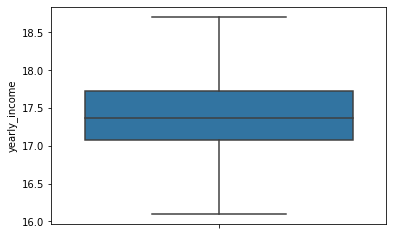

In [11]:
sns.boxplot(y= respec["yearly_income"])

### 2) Credit_score

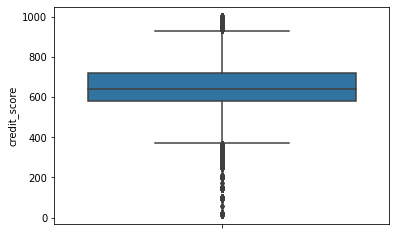

In [12]:
sns.boxplot(y= respec["credit_score"])

In [13]:
IQR = respec["credit_score"].quantile(0.75) - respec["credit_score"].quantile(0.25)
print(respec["credit_score"].quantile(0.25) - 1.5*IQR )
print(respec["credit_score"].quantile(0.75) + 1.5*IQR )

370.0
930.0


In [14]:
respec.loc[respec["credit_score"] <= (respec["credit_score"].quantile(0.25) - 1.5*IQR )] =(respec["credit_score"].quantile(0.25) - 1.5*IQR )
respec.loc[respec["credit_score"] >= (respec["credit_score"].quantile(0.75) + 1.5*IQR )] = (respec["credit_score"].quantile(0.75) + 1.5*IQR )

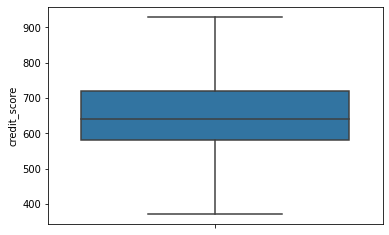

In [15]:
sns.boxplot(y= respec["credit_score"])

### desired_amount

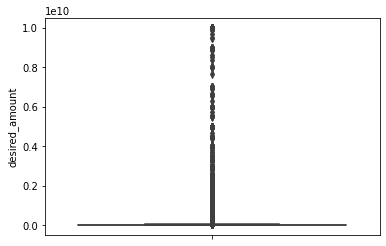

In [16]:
sns.boxplot(y= respec["desired_amount"])

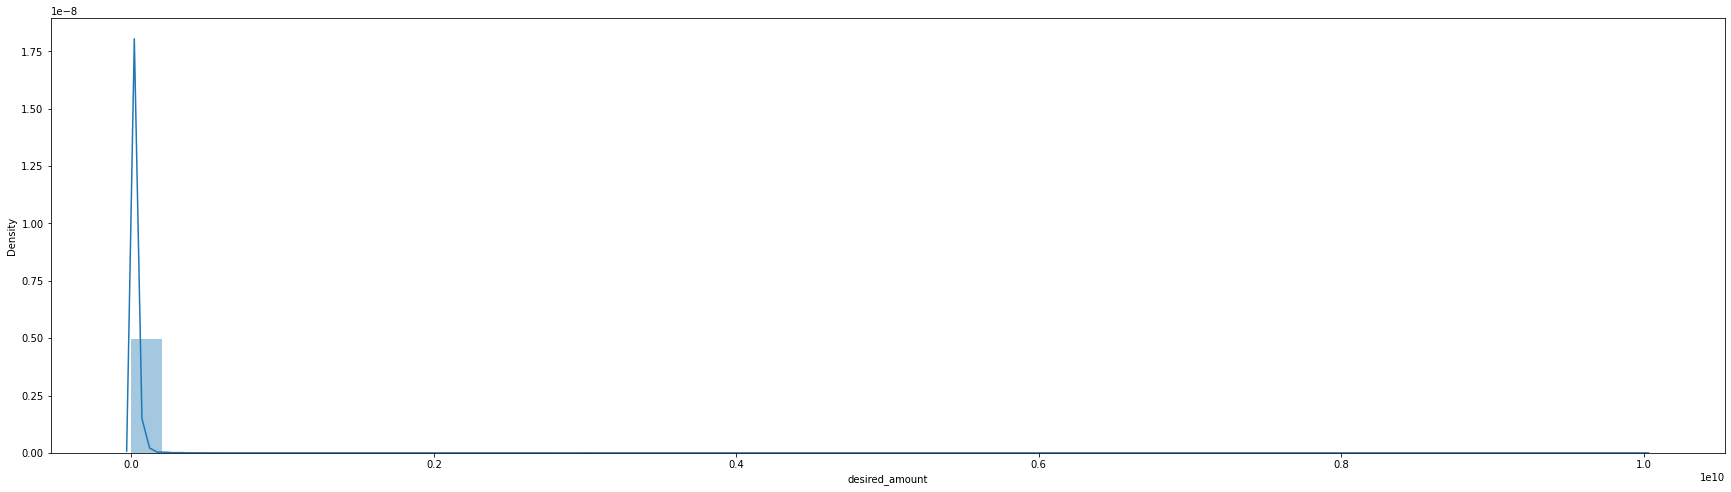

In [17]:
plt.figure(figsize=(30,8))
sns.distplot(respec["desired_amount"])
plt.show()

In [18]:
respec["desired_amount"]=np.log(respec["desired_amount"])

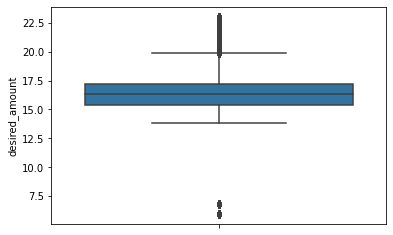

In [19]:
sns.boxplot(y= respec["desired_amount"])

In [20]:
IQR = respec["desired_amount"].quantile(0.75) - respec["desired_amount"].quantile(0.25)
print(respec["desired_amount"].quantile(0.25) - 1.5*IQR )
print(respec["desired_amount"].quantile(0.75) + 1.5*IQR )

12.737309266556295
19.904347143468506


In [21]:
respec.loc[respec["desired_amount"] <= (respec["desired_amount"].quantile(0.25) - 1.5*IQR )] =(respec["desired_amount"].quantile(0.25) - 1.5*IQR )
respec.loc[respec["desired_amount"] >= (respec["desired_amount"].quantile(0.75) + 1.5*IQR )] = (respec["desired_amount"].quantile(0.75) + 1.5*IQR )

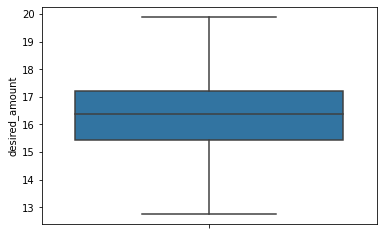

In [22]:
sns.boxplot(y= respec["desired_amount"])

### existing_loan_amt

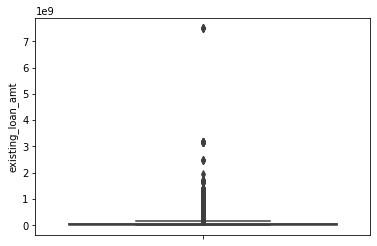

In [23]:
sns.boxplot(y= respec["existing_loan_amt"])

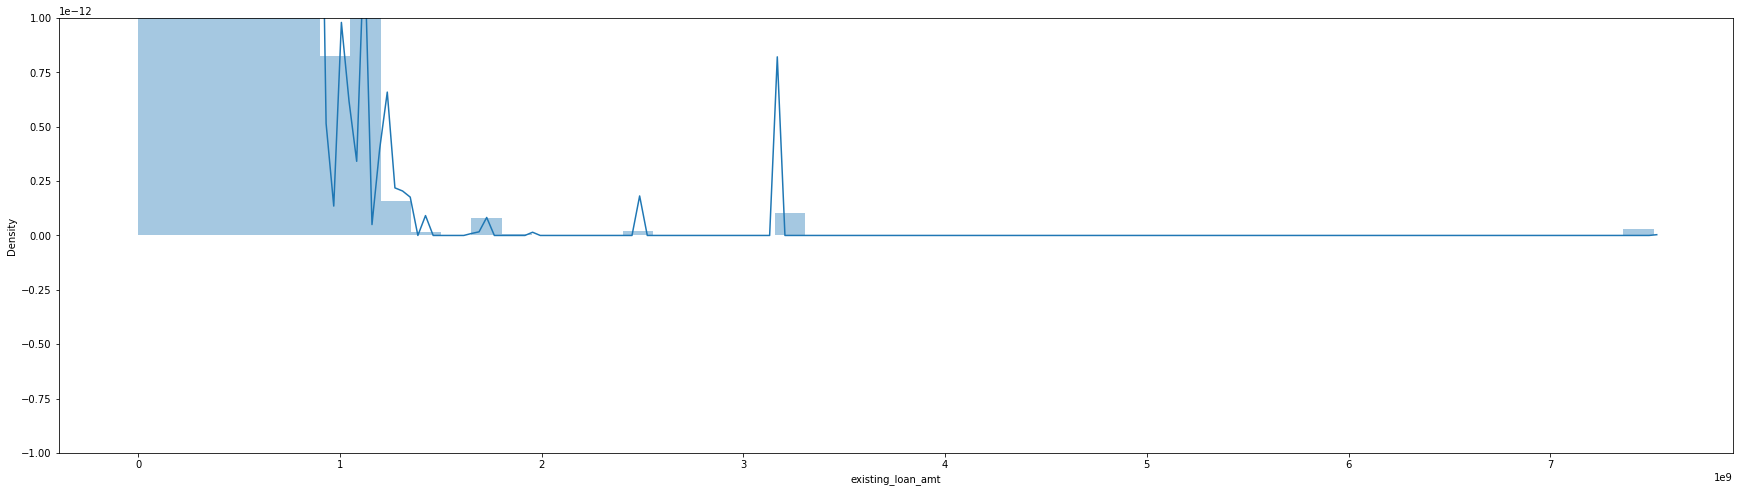

In [24]:
plt.figure(figsize=(30,8))
sns.distplot(respec["existing_loan_amt"])
plt.show()

In [25]:
respec["existing_loan_amt"]=np.log(respec["existing_loan_amt"])

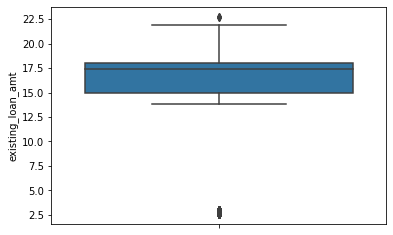

In [26]:
sns.boxplot(y= respec["existing_loan_amt"])

In [27]:
IQR = respec["existing_loan_amt"].quantile(0.75) - respec["existing_loan_amt"].quantile(0.25)
print(respec["existing_loan_amt"].quantile(0.25) - 1.5*IQR )
print(respec["existing_loan_amt"].quantile(0.75) + 1.5*IQR )

10.300460374791097
22.603560299701197


In [28]:
respec.loc[respec["existing_loan_amt"] <= (respec["existing_loan_amt"].quantile(0.25) - 1.5*IQR )] =(respec["existing_loan_amt"].quantile(0.25) - 1.5*IQR )
respec.loc[respec["existing_loan_amt"] >= (respec["existing_loan_amt"].quantile(0.75) + 1.5*IQR )] = (respec["existing_loan_amt"].quantile(0.75) + 1.5*IQR )

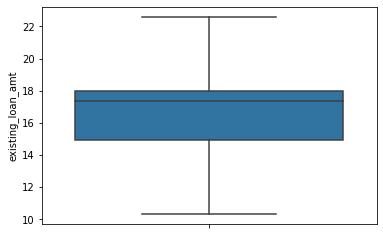

In [29]:
sns.boxplot(y= respec["existing_loan_amt"])